### Haar Cascades:

Haar Cascades are a type of machine learning-based object detection method used to identify objects in images or video. It was introduced by Viola and Jones in their seminal paper in 2001. Haar-like features are simple rectangular filters used to detect edges and texture variations in an image.

The training process involves using a large dataset of positive and negative images. Positive images contain the object of interest (e.g., faces), while negative images do not. The algorithm learns to distinguish between the two classes.

Once trained, a Haar Cascade model is capable of detecting the object it was trained for in new images.

Pros:

Fast and computationally efficient.

Can achieve real-time performance on standard hardware.

Works well in controlled environments.

Cons:

Less accurate compared to some deep learning-based approaches, especially in complex scenes or with variations in lighting, pose, and occlusions.

Requires manual feature engineering.

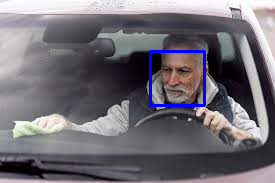

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the pre-trained face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Read the input image
img = cv2.imread('/content/download.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform face detection
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display the result in Colab
cv2_imshow(img)



### Single Shot MultiBox Detector (SSD)

SSD is a popular deep learning-based object detection algorithm that combines high accuracy with real-time performance. Unlike traditional methods that use multiple stages to detect objects, SSD performs object detection in a single pass through a deep neural network.

The network is trained to simultaneously predict object classes and their bounding box coordinates. It employs multiple convolutional layers at different scales to handle objects of various sizes.

SSD is known for its speed and ability to handle multi-class detection tasks.

Pros

Capable of detecting multiple objects in a single pass.

Offers a good balance between accuracy and speed.

Effective for real-time applications.

Cons

Requires a significant amount of training data for good performance.

Might struggle with very small objects or objects with fine details.

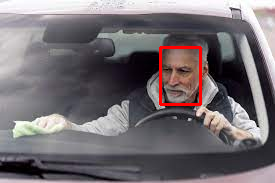

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the pre-trained SSD model for face detection
net = cv2.dnn.readNetFromCaffe('deploy.prototxt.txt', 'res10_300x300_ssd_iter_140000.caffemodel')

# Read the input image
img = cv2.imread('/content/download.jpeg')
h, w = img.shape[:2]

# Preprocess the image
blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

# Set the input to the neural network
net.setInput(blob)

# Perform face detection
detections = net.forward()

# Draw rectangles around detected faces
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.4:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        cv2.rectangle(img, (startX, startY), (endX, endY), (0, 0, 255), 2)

# Save or display the result
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


### MTCNN (Multi-Task Cascaded Convolutional Networks)

Explanation:

MTCNN is a state-of-the-art face detection algorithm designed to detect faces in images. It is capable of detecting faces at different scales and orientations.

The MTCNN algorithm consists of three stages:

Proposal Network (P-Net): Generates a set of candidate bounding boxes for faces.
Refinement Network (R-Net): Filters the candidate boxes and performs bounding box regression.
Output Network (O-Net): Further refines the results and performs facial landmark detection.
MTCNN is particularly effective for detecting faces in complex scenes with variations in scale, pose, and occlusions.

Pros:

Excellent accuracy, especially for face detection.
Robust to variations in lighting, pose, and occlusions.
Can detect faces at different scales.
Cons:

May be computationally more intensive than some other methods.
May not be as fast as some lightweight models for face detection.

In [ ]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.1 MB/s eta 0:00:00


1/1 [==============================] - 0s 119ms/step


1/1 [==============================] - 0s 150ms/step


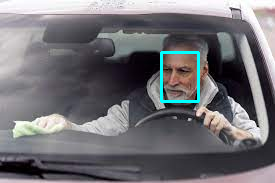

In [ ]:
from mtcnn import MTCNN
import cv2
from google.colab.patches import cv2_imshow
# Initialize the MTCNN detector
detector = MTCNN()

# Read the input image
img = cv2.imread('/content/download.jpeg')

# Detect faces
faces = detector.detect_faces(img)

# Draw rectangles around detected faces
for face in faces:
    x, y, w, h = face['box']
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 0), 2)

# Save or display the result
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
